In [1]:
%load_ext autoreload
%autoreload 2
import uproot
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak
import sys
sys.path.append("../../../analysisTools/")
from analysisTools import Analyzer
from analysisTools import loadSchema
import analysisTools as tools
import analysisSubroutines as routines
import plotTools as ptools
import utils
import importlib
import coffea.util as util
import time
import json
import os
import glob
import pandas as pd

### Import coffea files

In [24]:
prefix = './coffea/'
suffix = '_SSSF'

In [25]:
bkg_histo = util.load(f'{prefix}/background_VR{suffix}.coffea')[0]

In [26]:
data_histo = util.load(f'{prefix}/data_VR{suffix}.coffea')[0]

In [27]:
sig_histo = util.load(f'{prefix}/signal_VR{suffix}.coffea')[0]

### Efficiency

In [28]:
df_signal = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')
df_signal

,Preselections,n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 2","dPhi(MET,all jets) > 0.75",Vtx SSSF,BDT
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100,0.163943,0.062249,0.062249,0.053565,0.051823,0.051809,0.051809,0.051271,0.002733,0.001431
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100,4.431276,1.504675,1.504675,1.296402,1.270065,1.270065,1.270065,1.257408,0.058343,0.020338
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10,3.368019,1.750720,1.750720,1.514940,1.478711,1.478412,1.478412,1.464194,0.032333,0.012874
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100,0.212614,0.079743,0.079743,0.069361,0.067589,0.067589,0.067589,0.066806,0.003831,0.002265
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,43.307033,16.655337,16.655337,14.344635,13.955604,13.943156,13.943156,13.824962,0.267751,0.051356
...,...,...,...,...,...,...,...,...,...,...
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,21863.064444,5751.876680,5751.876680,4915.678620,4812.397742,4812.397742,4812.397742,4779.525698,202.114081,28.184772
sig_2018_Mchi-10p5_dMchi-1p0_ctau-10,1590.807353,484.964658,484.964658,423.494094,409.943189,409.493498,409.493498,406.781138,13.573078,0.451699
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1,913.497542,309.216032,309.216032,262.355690,255.812876,255.812876,255.812876,253.069351,4.430458,0.212086
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100,3.500245,1.236629,1.236629,1.069841,1.041160,1.040940,1.040940,1.031967,0.047506,0.020796


In [29]:
df_signal = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_vtx_matched')
df_signal

,Preselections,n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 2","dPhi(MET,all jets) > 0.75",Vtx SSSF,BDT
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100,1.0,0.947672,0.947672,0.948172,0.948340,0.948326,0.948326,0.949720,0.668429,0.950487
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100,1.0,0.937306,0.937306,0.937006,0.937801,0.937801,0.937801,0.939296,0.485785,0.950659
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10,1.0,0.962718,0.962718,0.962549,0.962441,0.962534,0.962534,0.963497,0.453702,0.848907
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100,1.0,0.947822,0.947822,0.950105,0.950628,0.950628,0.950628,0.953748,0.698760,0.945356
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,1.0,0.958141,0.958141,0.959317,0.958851,0.958815,0.958815,0.959250,0.226707,0.757748
...,...,...,...,...,...,...,...,...,...,...
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,1.0,0.932992,0.932992,0.932108,0.930651,0.930651,0.930651,0.930174,0.046437,0.333000
sig_2018_Mchi-10p5_dMchi-1p0_ctau-10,1.0,0.927309,0.927309,0.927426,0.930528,0.931550,0.931550,0.931094,0.066653,1.000000
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1,1.0,0.958369,0.958369,0.957360,0.959571,0.959571,0.959571,0.959133,0.190816,1.000000
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100,1.0,0.944060,0.944060,0.945164,0.945336,0.945324,0.945324,0.945697,0.511602,0.873615


In [30]:
df_bkg = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')
df_bkg

,Preselections,n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 2","dPhi(MET,all jets) > 0.75",Vtx SSSF,BDT
WJets,93278.655459,1139.922422,1139.922422,922.446741,880.220248,876.363243,874.572669,807.033215,320.943912,10.682392
Top,3966.402184,89.556113,89.556113,61.602724,55.369997,52.205368,52.152016,43.076365,10.052704,3.049780
Multiboson,2156.813970,26.122953,26.122953,18.390608,16.355733,15.926044,15.635081,15.367945,5.362488,0.000000
QCD,9553.011595,91.944941,91.944941,9.089833,9.089833,9.089833,9.089833,0.000000,0.000000,0.000000
DY,1895.287296,30.405679,30.405679,27.027270,23.648861,23.648861,23.648861,23.648861,0.000000,0.000000
ZJets,28746.129776,611.158243,611.158243,509.734700,486.311230,483.644315,482.537431,457.102668,167.140158,3.827352
Total,139596.300279,1989.110351,1989.110351,1548.291876,1470.995902,1460.877663,1457.635892,1346.229053,503.499261,17.559524


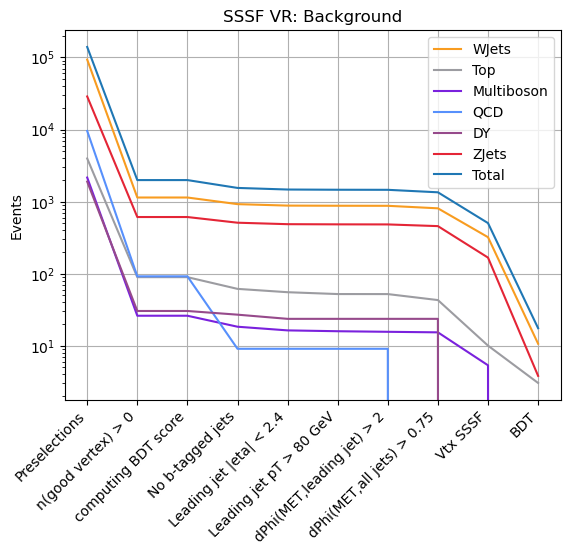

In [31]:
df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')

ptools.plot_bkg_efficiency(bkg_histo, df, doLog = True, ylabel = 'Events', title = 'SSSF VR: Background')

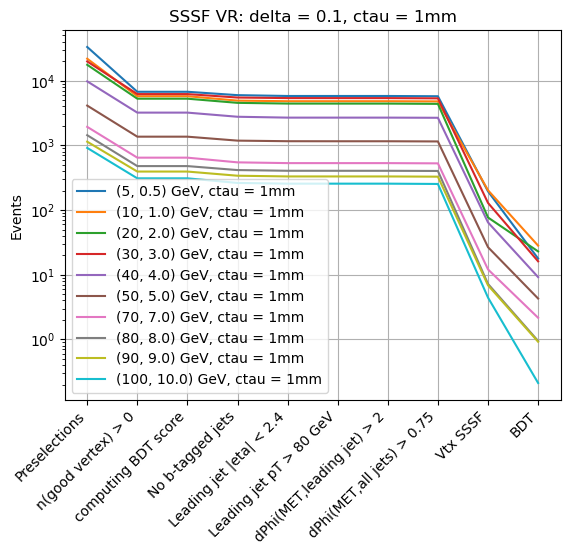

In [32]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

m1s = [5, 10, 20, 30, 40, 50, 70, 80, 90, 100]
deltas = [0.1]
ctaus = [1]

title = f'SSSF VR: delta = {deltas[0]}, ctau = {ctaus[0]}mm'
ptools.plot_signal_efficiency(sig_histo, df, m1s, deltas, ctaus, doLog = True, ylabel = 'Events', title = title)

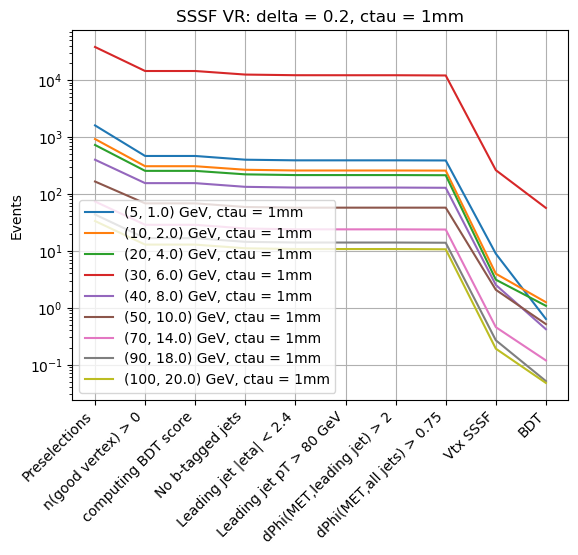

In [33]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

m1s = [5, 10, 20, 30, 40, 50, 70, 80, 90, 100]
deltas = [0.2]
ctaus = [1]

title = f'SSSF VR: delta = {deltas[0]}, ctau = {ctaus[0]}mm'
ptools.plot_signal_efficiency(sig_histo, df, m1s, deltas, ctaus, doLog = True, ylabel = 'Events', title = title)

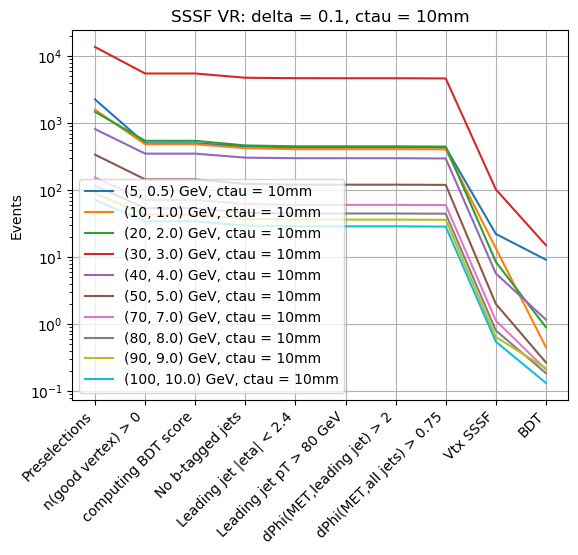

In [34]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

m1s = [5, 10, 20, 30, 40, 50, 70, 80, 90, 100]
deltas = [0.1]
ctaus = [10]

title = f'SSSF VR: delta = {deltas[0]}, ctau = {ctaus[0]}mm'
ptools.plot_signal_efficiency(sig_histo, df, m1s, deltas, ctaus, doLog = True, ylabel = 'Events', title = title)

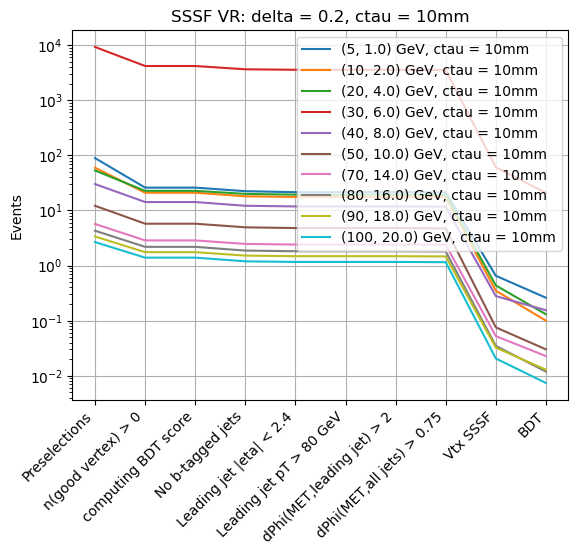

In [35]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

m1s = [5, 10, 20, 30, 40, 50, 70, 80, 90, 100]
deltas = [0.2]
ctaus = [10]

title = f'SSSF VR: delta = {deltas[0]}, ctau = {ctaus[0]}mm'
ptools.plot_signal_efficiency(sig_histo, df, m1s, deltas, ctaus, doLog = True, ylabel = 'Events', title = title)

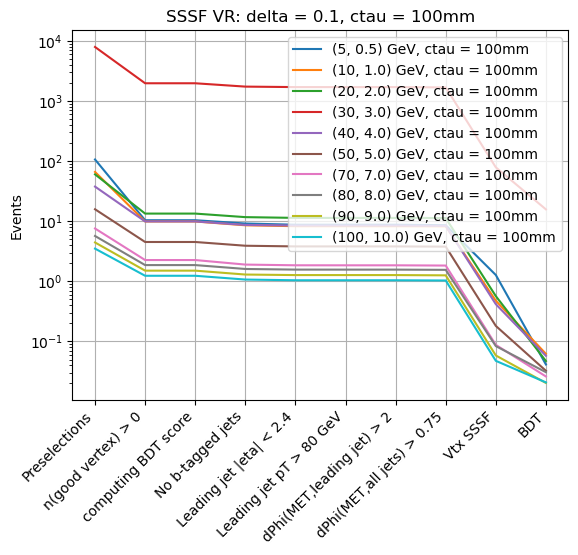

In [36]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

m1s = [5, 10, 20, 30, 40, 50, 70, 80, 90, 100]
deltas = [0.1]
ctaus = [100]

title = f'SSSF VR: delta = {deltas[0]}, ctau = {ctaus[0]}mm'
ptools.plot_signal_efficiency(sig_histo, df, m1s, deltas, ctaus, doLog = True, ylabel = 'Events', title = title)

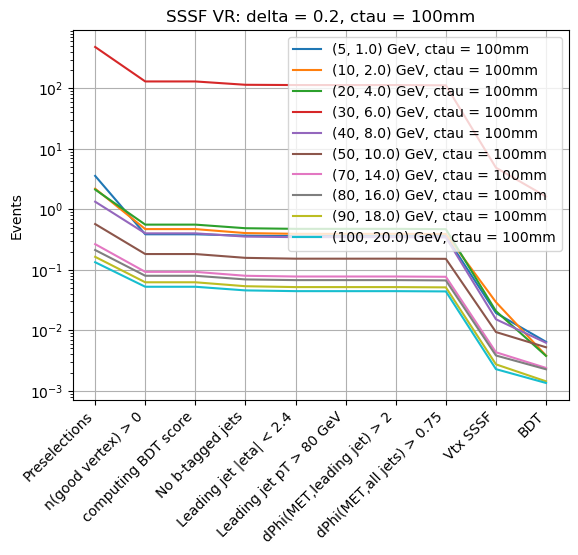

In [37]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

m1s = [5, 10, 20, 30, 40, 50, 70, 80, 90, 100]
deltas = [0.2]
ctaus = [100]

title = f'SSSF VR: delta = {deltas[0]}, ctau = {ctaus[0]}mm'
ptools.plot_signal_efficiency(sig_histo, df, m1s, deltas, ctaus, doLog = True, ylabel = 'Events', title = title)

/uscms/home/kyungmip/nobackup/miniconda3/envs/coffea/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


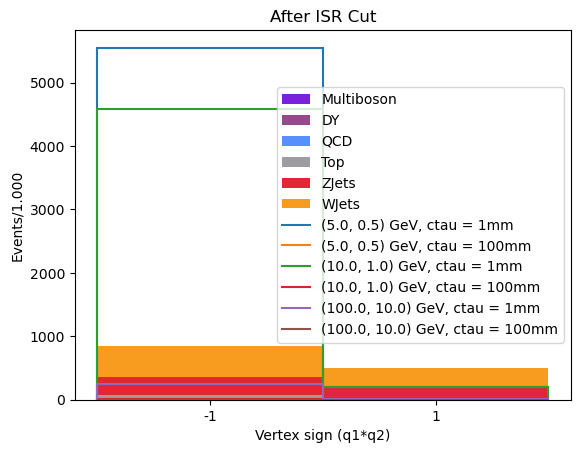

In [42]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_sign',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': [0,6],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# bkg
ptools.plot_bkg_1d(ax, bkg_histo, plot_dict, style_dict, isLegacy = False)

# signal points
m1s = [5, 10, 100]
deltas = [0.1]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            ptools.plot_signal_1D(ax, sig_histo, m1, delta, ctau, plot_dict, style_dict)

plt.title('After ISR Cut')
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_sign',
    'cut': 'cut11',
}

style_dict = {
    'rebin': 1j,
    'xlim': [0,6],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# bkg
ptools.plot_bkg_1d(ax, bkg_histo, plot_dict, style_dict, isLegacy = False)

# signal points
m1s = [5, 10, 100]
deltas = [0.1]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            ptools.plot_signal_1D(ax, sig_histo, m1, delta, ctau, plot_dict, style_dict)

plt.title('After BDT Cut')
plt.legend()
plt.show()